In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import pandas as pd
import os 
import numpy as np

In [32]:
!pip install matplotlib 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 26.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.1/257.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 25.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 4.0 MB/s eta 0:00:00


In [33]:
import matplotlib.pyplot as plt

In [3]:
outputdir = "../output/evaluation/processed"
projects = ['Lang', 'Math']#, 'Time', 'Closure', 'Cli', 'Compress', 'Codec', 'Collections', 'Csv', 
    #'JacksonCore', 'JacksonXml', 'JxPath', 'Jsoup']

In [13]:
dfs, dfs_wo_thr = [], []
for project in projects:
    mut_propa_stat_debt_file = os.path.join(outputdir, f"{project}.indv_mut_propagation_status_and_debt.csv") 
    df = pd.read_csv(mut_propa_stat_debt_file)
    df['project'] = [project] * len(df)
    dfs_wo_thr.append(df)
    df = df.loc[~((df.status == 'latent') & (df.debt_time > 365))]
    df = df.loc[~((df.status == 'non-latent') & (df.debt_time <= 365))]
    df = df.loc[~((df.status == 'discard') & (df.debt_time > 365))]
    dfs.append(df)
cdf = pd.concat(dfs)
cdf_wo_thr = pd.concat(dfs_wo_thr)

In [96]:
cdf_wo_thr.mutK.values[0]

'src.main.java.org.apache.commons.lang3.math.NumberUtils-18'

In [101]:
cdf_wo_thr[~cdf_wo_thr.debt_nc.isnull()].shape, cdf_wo_thr.shape

((3124, 8), (3124, 8))

In [15]:
def compare_surv_dur(df, df_wo_thr, target_col):
    line = ""
    grouped = df.groupby('status')
    grouped_wo_thr = df_wo_thr.groupby('status')
    for status in ['latent']:#, 'non-latent', 'discard']:
        adf = grouped.get_group(status)
        a_adf = grouped_wo_thr.get_group(status)
        vs = adf[target_col].values 
        n_25 = int(np.round(np.percentile(vs, 25)))
        n_50 = int(np.round(np.percentile(vs, 50)))
        n_75 = int(np.round(np.percentile(vs, 75)))
        n_mean = int(np.round(adf[target_col].mean()))
        a_vs = a_adf[target_col].values 
        a_n_25 = int(np.round(np.percentile(a_vs, 25)))
        a_n_50 = int(np.round(np.percentile(a_vs, 50)))
        a_n_75 = int(np.round(np.percentile(a_vs, 75)))
        a_n_mean = int(np.round(a_adf[target_col].mean()))
        line += f" & {n_25} ({a_n_25})& {n_50} ({a_n_50})& {n_75} ({a_n_75})& {n_mean} ({a_n_mean})"
    print (line + "\\\\")

project = 'Lang'
line = ""
grouped = cdf.groupby('status')
for status in ['latent']:#, 'non-latent', 'discard']:
    target_cdf = cdf.loc[cdf.project == project]
    target_cdf_wo_thr = cdf_wo_thr.loc[cdf_wo_thr.project == project]
    compare_surv_dur(target_cdf, target_cdf_wo_thr, 'debt_time')
    compare_surv_dur(target_cdf, target_cdf_wo_thr, 'debt_nc')

 & 2 (23)& 22 (339)& 227 (427)& 100 (328)\\
 & 5 (34)& 34 (326)& 160 (469)& 90 (330)\\


In [76]:
project = 'Math'
line = ""
grouped = cdf.groupby('status')
for status in ['latent']:#, 'non-latent', 'discard']:
    target_cdf = cdf.loc[cdf.project == project]
    target_cdf_wo_thr = cdf_wo_thr.loc[cdf_wo_thr.project == project]
    compare_surv_dur(target_cdf, target_cdf_wo_thr, 'debt_time')
    compare_surv_dur(target_cdf, target_cdf_wo_thr, 'debt_nc')

 & 8 (9)& 24 (40)& 120 (291)& 81 (182)\\
 & 22 (23)& 52 (61)& 236 (458)& 176 (346)\\


<Axes: ylabel='Frequency'>

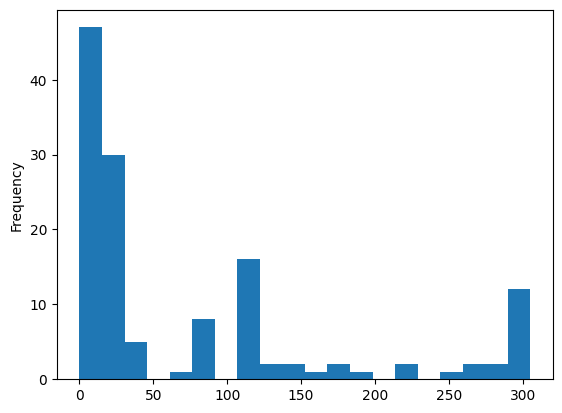

In [77]:
#fig, ax = plt.subplots(figsize = (6,6))
target_cdf_wo_thr.loc[(target_cdf_wo_thr.status == 'latent') & (target_cdf_wo_thr.debt_time <= 328)].debt_time.plot.hist(bins = 20)

61.0


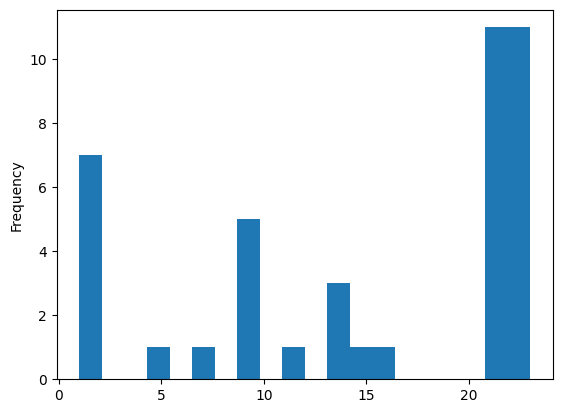

In [86]:
#fig, ax = plt.subplots(figsize = (6,6))
d_target_cdf_wo_thr = target_cdf_wo_thr.loc[target_cdf_wo_thr.status == 'latent']
d_target_cdf_wo_thr.loc[
    d_target_cdf_wo_thr.debt_nc <= np.percentile(d_target_cdf_wo_thr.debt_nc.values, 25)
    ].debt_nc.plot.hist(bins = 20)

print (np.percentile(d_target_cdf_wo_thr.debt_nc.values, 50))

In [79]:
d_target_cdf_wo_thr.value_counts('bid')

bid
20     32
19     22
16     17
18     14
15     12
49      7
55      6
63      6
78      4
71      4
67      3
6       3
52      3
103     3
92      3
85      2
66      2
99      2
93      2
10      2
82      2
98      1
95      1
94      1
3       1
84      1
77      1
74      1
72      1
28      1
24      1
21      1
104     1
dtype: int64

In [82]:
adf = target_cdf_wo_thr.loc[target_cdf_wo_thr.bid.isin(d_target_cdf_wo_thr.bid.unique())].value_counts('bid')

bid
15     279
16     254
6      151
19     112
20     112
18     102
52      66
55      53
49      51
63      49
72      34
3       23
78      23
71      21
10      21
24      20
99      17
92      15
66      15
74      13
28      13
67      12
103     11
85       7
93       7
94       7
98       7
104      6
84       5
77       5
21       4
82       3
95       3
dtype: int64

In [50]:
target_cdf_wo_thr.loc[(target_cdf_wo_thr.status == 'latent') & (target_cdf_wo_thr.debt_time <= 328)].debt_time

39       27.492905
209      10.039549
210      10.039549
211     152.358322
252      24.309525
           ...    
1923    296.864919
2024      4.516713
2041     40.004005
2048    196.820637
2049    249.332106
Name: debt_time, Length: 134, dtype: float64

In [46]:
target_cdf_wo_thr.loc[target_cdf_wo_thr.status == 'latent'].debt_time.min(), target_cdf_wo_thr.loc[target_cdf_wo_thr.status == 'latent'].debt_time.max()

(0.0518634259259259, 1227.3904398148147)

In [ ]:
target_cdf.plot.hist(by = 'debt_time')

In [104]:
!pip install pydriller 

  Using cached types_pytz-2023.3.1.1-py3-none-any.whl.metadata (1.3 kB)
  Using cached lizard-1.17.10-py2.py3-none-any.whl (66 kB)
Using cached types_pytz-2023.3.1.1-py3-none-any.whl (4.9 kB)


In [160]:
import pydriller 

#workdir = "workdir/mutPropRepli/workdir/Lang7temp2"
workdir = "/Users/jeongju.sohn/workdir/tools/defects4j/project_repos/commons-lang.git"
repo = pydriller.Repository("/Users/jeongju.sohn/workdir/mutPropRepli/workdir/Lang7temp2", order = 'reverse')
commits = list(repo.traverse_commits())

In [161]:
commits[0].modified_files[-1].changed_methods[0].start_line, commits[0].modified_files[-1].changed_methods[0].end_line

(343, 363)

In [162]:
commits[0].modified_files[-1].diff_parsed['added']

[(351,
  '        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("0xff"));'),
 (352,
  '        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("#ff"));'),
 (353,
  '        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0xff"));'),
 (354,
  '        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("0377"));'),
 (355,
  '        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0377"));'),
 (356,
  '        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0377"));'),
 (357,
  '        assertEquals("createBigInteger(String) failed", new BigInteger("-0"), NumberUtils.createBigInteger("-0"));'),
 (358,
  '        assertEquals("createBigInteger(String) failed", new BigInteger(

In [163]:
mf = commits[0].modified_files[-1]
added = mf.diff_parsed["added"]
deleted = mf.diff_parsed["deleted"] 
new_methods = mf.methods 
old_methods = mf.methods_before

In [164]:
method_changed_new = {
    y 
    for x in added 
    for y in new_methods 
    if y.start_line <= x[0] <= y.end_line # meaning whether a method include that lines 
}

method_changed_old = {
    y 
    for x in deleted 
    for y in old_methods 
    if y.start_line <= x[0] <= y.end_line # meaning whether a method include that lines 
}

In [165]:
len(mf.methods_before), len(mf.methods)

(83, 83)

In [116]:
print(commits[-1].modified_files[-1].diff)

@@ -348,6 +348,18 @@ public class NumberUtilsTest {
         this.testCreateBigIntegerFailure("\b\t\n\f\r");
         // Funky whitespaces
         this.testCreateBigIntegerFailure("\u00A0\uFEFF\u000B\u000C\u001C\u001D\u001E\u001F");
+        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("0xff"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("#ff"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0xff"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("0377"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0377"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0377"));
+        assertEquals("createBigInteger(String)

In [178]:
mf.change_type in [pydriller.ModificationType.RENAME, pydriller.ModificationType.

True

In [172]:
type(commits[0].modified_files[-1].old_path)

str

In [167]:
print(commits[0].modified_files[-1].diff)

@@ -348,6 +348,18 @@ public class NumberUtilsTest {
         this.testCreateBigIntegerFailure("\b\t\n\f\r");
         // Funky whitespaces
         this.testCreateBigIntegerFailure("\u00A0\uFEFF\u000B\u000C\u001C\u001D\u001E\u001F");
+        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("0xff"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("#ff"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0xff"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("255"), NumberUtils.createBigInteger("0377"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0377"));
+        assertEquals("createBigInteger(String) failed", new BigInteger("-255"), NumberUtils.createBigInteger("-0377"));
+        assertEquals("createBigInteger(String)

In [156]:
import sys 

sys.path.append('..')
import utils.analysis_utils as analysis_utils 
project = 'Lang'
NEED_TO_FILTER_OPS = None 
NEED_TO_FOUCS_OPS = ['MATH','CONDITIONALS_BOUNDARY',
    'INCREMENTS','INVERT_NEGS','NEGATE_CONDITIONALS','VOID_METHOD_CALLS','PRIMITIVE_RETURNS','EMPTY_RETURNS',
    'FALSE_RETURNS','TRUE_RETURNS','NULL_RETURNS',]

_, _, mapped_to_uniq_mutK = analysis_utils.group_same_mutants(
    '/Users/jeongju.sohn/workdir/mutBugInducing/output/pit/remote/final_latest', 
    project, '19b63720', 
    needToFocusOps=NEED_TO_FOUCS_OPS,
    needToFilterOps=NEED_TO_FILTER_OPS, 
    regen_uniq=True)

In [158]:
mapped_to_uniq_mutK['src.main.java.org.apache.commons.lang3.StringUtils-13']

'src.main.java.org.apache.commons.lang3.StringUtils-13'

In [159]:
for k,v in mapped_to_uniq_mutK.items():
    if v == 'src.main.java.org.apache.commons.lang3.StringUtils-13':
        print (k)

src.main.java.org.apache.commons.lang3.StringUtils-23
src.main.java.org.apache.commons.lang3.StringUtils-13
